In [1]:
pip install streamlit pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.8 MB/s eta 0:00:00


2024-12-18 09:51:20.148 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:51:20.150 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-18 09:51:20.152 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching
logic used by `st.cache_data` and `st.cache_resource`. This might lead to some problems
or unexpected behavior in certain edge cases.

2024-12-18 09:51:20.154 No runtime found, using MemoryCacheStorageManager
2024-12-18 09:51:20.167 No runtime found, using MemoryCacheStorageManager
2024-12-18 09:51:20.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running i

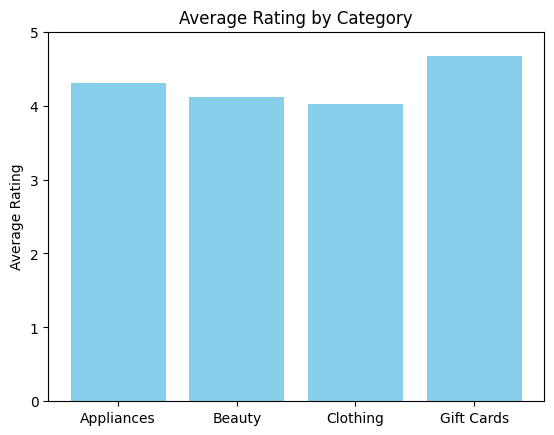

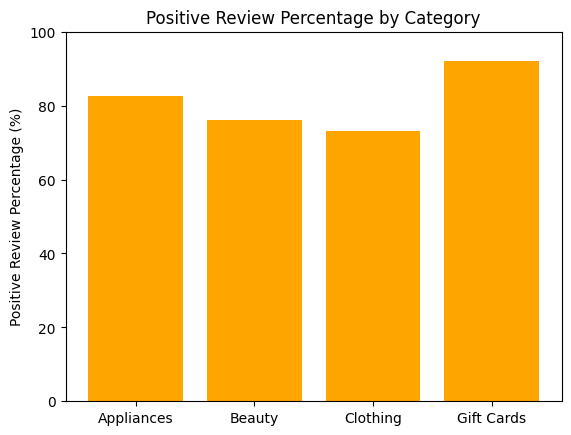

In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets (you can replace paths with actual paths)
@st.cache
def load_data():
    gift_cards = pd.read_csv('Gift_Cards.csv')
    clothing = pd.read_csv('Clothing.csv')
    all_beauty = pd.read_csv('All_Beauty.csv')
    appliances = pd.read_csv('Appliances.csv')

    # Add category column
    gift_cards['category'] = 'Gift Cards'
    clothing['category'] = 'Clothing'
    all_beauty['category'] = 'Beauty'
    appliances['category'] = 'Appliances'

    # Rename rating columns for consistency
    gift_cards = gift_cards.rename(columns={'1.0': 'rating'})
    clothing = clothing.rename(columns={'5.0': 'rating'})
    all_beauty = all_beauty.rename(columns={'1.0': 'rating'})
    appliances = appliances.rename(columns={'5.0': 'rating'})

    # Combine datasets
    combined = pd.concat([gift_cards, clothing, all_beauty, appliances], ignore_index=True)
    combined['timestamp_readable'] = pd.to_datetime(combined.iloc[:, 3], unit='s', errors='coerce')
    combined['year'] = combined['timestamp_readable'].dt.year
    combined['positive_review'] = (combined['rating'] > 3).astype(int)

    return combined

# Load data
data = load_data()

# Aggregated category summary
category_summary = data.groupby('category').agg(
    average_rating=('rating', 'mean'),
    positive_review_percentage=('positive_review', 'mean')
).reset_index()
category_summary['positive_review_percentage'] *= 100

# Streamlit App
st.title("E-commerce Product Reviews Analysis")

st.header("Category Summary")
st.dataframe(category_summary)

st.header("Visualizations")

# Visualization 1: Average Rating by Category
st.subheader("Average Rating by Category")
fig1, ax1 = plt.subplots()
ax1.bar(category_summary['category'], category_summary['average_rating'], color='skyblue')
ax1.set_title("Average Rating by Category")
ax1.set_ylabel("Average Rating")
ax1.set_ylim(0, 5)
st.pyplot(fig1)

# Visualization 2: Positive Review Percentage by Category
st.subheader("Positive Review Percentage by Category")
fig2, ax2 = plt.subplots()
ax2.bar(category_summary['category'], category_summary['positive_review_percentage'], color='orange')
ax2.set_title("Positive Review Percentage by Category")
ax2.set_ylabel("Positive Review Percentage (%)")
ax2.set_ylim(0, 100)
st.pyplot(fig2)

st.header("Recommendations")
st.write("Based on the analysis, categories with the highest positive review percentages:")
st.write(category_summary.sort_values(by='positive_review_percentage', ascending=False).head(3))
